
# Probabilistic gradient pruning
<p align="left">
<img src="https://github.com/mit-han-lab/torchquantum/blob/master/torchquantum_logo.jpg?raw=true" alt="torchquantum Logo" width="250">
</p>

Tutorial Author: Zirui Li, Hanrui Wang


bugs:
 - Directly run all. In the first epoch, the process will get stuck in the inference phase.
 - modify `torchquantum/plugins/qiskit_processor.py:228 parallel=True` to `parallel=False` to fix the bug.


## Outline
 - Introduction to probabilistic gradient pruning.
 - Train a model with gradient pruning.

## Introduction to probabilistic gradient pruning

By carefully investigating the on-chip training process, we observe that small gradients tend to have large relative variations
or even wrong directions under quantum noises. Also, not all gradient computations are necessary for the
training process, especially for small-magnitude gradients. 

The observations provide great opportunities for us to boost the robustness and efficiency of QNN on-chip learning. Inspired by that, we
propose a **probabilistic gradient pruning** method to predict and only
compute gradients of high reliability. Hence we can reduce noise impact and also save the required number of circuit runs on real
quantum machines.

### Accumulation Window and Pruning Window

We separate all the training epochs into a repeat of an accumulation window followed by a pruning window. There are three important hyper-parameters in our probabilistic gradient pruning method:
  - accumulation window width 𝑤𝑎,
  - pruning ratio 𝑟,
  - pruning window width 𝑤𝑝 .

In the accumulation window, we collect the information of gradients in each training step. In each step of the pruning window, we probabilistically exempt the calculations of some gradients based on the information collected from the accumulation window and pruning ratio.

<div align="center">
<img src="https://github.com/mit-han-lab/torchquantum/blob/master/figs/probabilistic_gradient_pruning.png?raw=true" alt="conv-full-layer" width="800">
</div>

The accumulation window width
and pruning window width decide the reliability of the gradient
trend evaluation and our confidence in it, respectively. The pruning
ratio can be tuned to balance the gradient variances caused by noise
perturbation and pruning. Thus, the percentage of the time saved
by our probabilistic gradient pruning method is $𝑟\frac{𝑤𝑝}{𝑤𝑎+𝑤𝑝}× 100%$.
In
our experiments, we find that the setting (𝑤𝑎=1, 𝑤𝑝=2∼3, 𝑟=0.3∼0.5)
usually works well in all cases

##Train a model with probabilistic gradient pruning

###Installation

In [ ]:
!pip install qiskit==0.32.1

     |████████████████████████████████| 6.1 MB 5.0 MB/s 
     |████████████████████████████████| 17.9 MB 506 kB/s 
     |████████████████████████████████| 237 kB 54.7 MB/s 
     |████████████████████████████████| 207 kB 65.9 MB/s 
     |████████████████████████████████| 2.1 MB 39.6 MB/s 
     |████████████████████████████████| 1.6 MB 36.5 MB/s 
     |████████████████████████████████| 610 kB 54.4 MB/s 
     |████████████████████████████████| 54 kB 3.5 MB/s 
     |████████████████████████████████| 49 kB 7.8 MB/s 
     |████████████████████████████████| 943 kB 48.7 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 3.6 MB 53.1 MB/s 
     |████████████████████████████████| 6.4 MB 52.2 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
  Created wheel for qiskit: filename=qiskit-0.32.1-py3-none-any.whl size=11777 sha256=0da44b2b1281b0ae4c6e2615fcd1db002c7b2a0f27dfff24fc5292884896d11f
  Stored in directory: /root/.cache/pip/whee

In [ ]:
!git clone https://github.com/zhijian-liu/torchpack.git

Cloning into 'torchpack'...
remote: Enumerating objects: 3924, done.
remote: Counting objects: 100% (329/329), done.
remote: Compressing objects: 100% (217/217), done.
remote: Total 3924 (delta 174), reused 210 (delta 94), pack-reused 3595
Receiving objects: 100% (3924/3924), 1012.96 KiB | 16.08 MiB/s, done.
Resolving deltas: 100% (2521/2521), done.


In [ ]:
%cd torchpack

/content/torchpack


In [ ]:
!pip install .

Processing /content/torchpack
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 58 kB 3.3 MB/s 
  Created wheel for torchpack: filename=torchpack-0.3.1-py3-none-any.whl size=34632 sha256=6e05974cb0c985fbc1e541043be80ee7da98c12608ff883943ee70843656c42a
  Stored in directory: /tmp/pip-ephem-wheel-cache-njdff8xi/wheels/4f/c9/1a/b8f5a127071f807be5ee14d3d364b428a891ad020a962af415
Successfully built torchpack


In [ ]:
%cd ..

/content


Download and cd to the repo.

In [ ]:
!git clone https://github.com/mit-han-lab/torchquantum.git

Cloning into 'torchquantum'...
remote: Enumerating objects: 10990, done.
remote: Counting objects: 100% (7782/7782), done.
remote: Compressing objects: 100% (3963/3963), done.
remote: Total 10990 (delta 3911), reused 7243 (delta 3410), pack-reused 3208
Receiving objects: 100% (10990/10990), 6.24 MiB | 18.09 MiB/s, done.
Resolving deltas: 100% (5878/5878), done.


In [ ]:
%cd torchquantum

/content/torchquantum


Install torch-quantum.

In [ ]:
!pip install --editable .

Obtaining file:///content/torchquantum
     |████████████████████████████████| 11.2 MB 5.1 MB/s 
     |████████████████████████████████| 81 kB 11.2 MB/s 
     |████████████████████████████████| 899 kB 54.9 MB/s 
     |████████████████████████████████| 65 kB 4.5 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
  Running setup.py develop for torchquantum
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Change PYTHONPATH and install other packages.

In [ ]:
%env PYTHONPATH=.

env: PYTHONPATH=.


Run the following code to store a qiskit token. You can replace it with your own token from your IBMQ account if you like.



In [ ]:
from qiskit import IBMQ
IBMQ.save_account('0238b0afc0dc515fe7987b02706791d1719cb89b68befedc125eded0607e6e9e9f26d3eed482f66fdc45fdfceca3aab2edb9519d96b39e9c78040194b86e7858', overwrite=True)

In [ ]:
!pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 5.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchquantum 0.1.0 requires matplotlib>=3.3.2, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!ls artifact

aerbackend.py  example2  example4  example6  README.md
example1       example3  example5  example7


In [ ]:
!cp artifact/aerbackend.py ../../usr/local/lib/python3.7/dist-packages/qiskit/providers/aer/backends/ -r

### Import modules

In [ ]:
import argparse
import os
import sys
import pdb
import json
import numpy as np
import torch
import torch.backends.cudnn
import torch.cuda
import torch.nn
import torch.utils.data
import torchquantum as tq

from torch.optim.lr_scheduler import CosineAnnealingLR

from torchquantum.datasets import MNIST
from examples.gradient_pruning.q_models import *
from torchpack.callbacks import (InferenceRunner, MeanAbsoluteError,
                                 MaxSaver, MinSaver,
                                 Saver, SaverRestore, CategoricalAccuracy)
from examples.gradient_pruning.callbacks import LegalInferenceRunner, SubnetInferenceRunner, \
    NLLError, TrainerRestore, AddNoiseInferenceRunner, GradRestore

# from torchpack import distributed as dist
from torchpack.environ import set_run_dir
from torchpack.utils.config import configs
from torchpack.utils.logging import logger





run python fix_qiskit_parameterization.py to fix it!


###Function to build the callbacks

In [ ]:
def get_subcallbacks(config):
    subcallbacks = []
    for subcallback in config:
        if subcallback['metrics'] == 'CategoricalAccuracy':
            subcallbacks.append(
                CategoricalAccuracy(name=subcallback['name'])
            )
        elif subcallback['metrics'] == 'MeanAbsoluteError':
            subcallbacks.append(
                MeanAbsoluteError(name=subcallback['name'])
            )
        elif subcallback['metrics'] == 'NLLError':
            subcallbacks.append(
                NLLError(name=subcallback['name'])
            )
        else:
            raise NotImplementedError(subcallback['metrics'])
    return subcallbacks


def make_callbacks(dataflow):
    callbacks = []
    for config in configs['callbacks']:
        if config['callback'] == 'InferenceRunner':
            callback = InferenceRunner(
                dataflow=dataflow[config['split']],
                callbacks=get_subcallbacks(config['subcallbacks'])
            )
        elif config['callback'] == 'LegalInferenceRunner':
            callback = LegalInferenceRunner(
                dataflow=dataflow[config['split']],
                callbacks=get_subcallbacks(config['subcallbacks'])
            )
        elif config['callback'] == 'SubnetInferenceRunner':
            callback = SubnetInferenceRunner(
                dataflow=dataflow[config['split']],
                callbacks=get_subcallbacks(config['subcallbacks']),
                subnet=config['subnet']
            )
        elif config['callback'] == 'AddNoiseInferenceRunner':
            callback = AddNoiseInferenceRunner(
                dataflow=dataflow[config['split']],
                callbacks=get_subcallbacks(config['subcallbacks']),
                noise_total_prob=config['noise_total_prob']
            )
        elif config['callback'] == 'SaverRestore':
            callback = SaverRestore()
        elif config['callback'] == 'Saver':
            callback = Saver(max_to_keep=config['max_to_keep'])
        elif config['callback'] == 'MaxSaver':
            callback = MaxSaver(config['name'])
        elif config['callback'] == 'MinSaver':
            callback = MinSaver(config['name'])
        elif config['callback'] == 'GradRestore':
            callback = GradRestore()
        else:
            raise NotImplementedError(config['callback'])
        callbacks.append(callback)

    return callbacks


###Load configs
The config file describes everything about the model structure and the hyper-parameters of the training process, including batch size, learning rate, number of epochs, and whether to use qiskit's processor(we use qiskit's noise processor to train and test our quantum circuit in the following example).

In [ ]:
configs.load('examples/gradient_pruning/configs.yml')
if configs.debug.set_seed:
    torch.manual_seed(configs.debug.seed)
    np.random.seed(configs.debug.seed)

###Function to train
In this function, we create the dataset and the model according to configs. And we train our quantum model using qiskit's noise processor. The function will return a list of model accuracy after each epoch with respect to the number of inferences.

In [ ]:
def train_with_configs(configs):
  if os.path.exists("runs/probabilistic_gradient_pruning/summary/scalars.jsonl"):
    os.remove("runs/probabilistic_gradient_pruning/summary/scalars.jsonl")
  else:
    print("runs/probabilistic_gradient_pruning/summary/scalars.jsonl does not exist")

  device = torch.device('cuda')
  if isinstance(configs.optimizer.lr, str):
    configs.optimizer.lr = eval(configs.optimizer.lr)
  dataset = MNIST(
      root='./mnist_data',
      train_valid_split_ratio=[0.9, 0.1],
      digits_of_interest=[0, 1, 2, 3],
      n_test_samples=30,
      n_train_samples=50,
      n_valid_samples=30,
  )
  dataflow = dict()
  for split in dataset:
      sampler = torch.utils.data.RandomSampler(dataset[split])
      dataflow[split] = torch.utils.data.DataLoader(
          dataset[split],
          batch_size=configs.run.bsz,
          sampler=sampler,
          num_workers=configs.run.workers_per_gpu,
          pin_memory=True)

  model = QMultiFCModel0(configs.model.arch)

  if configs.qiskit.use_qiskit_train or configs.qiskit.use_qiskit_valid:
      from torchquantum.plugins import QiskitProcessor
      processor = QiskitProcessor(use_real_qc=configs.qiskit.use_real_qc, n_shots=configs.qiskit.n_shots, backend_name=configs.qiskit.backend_name)
      model.set_qiskit_processor(processor)

  model.to(device)

  total_params = sum(p.numel() for p in model.parameters())
  logger.info(f'Model Size: {total_params}')

  criterion = torch.nn.NLLLoss()
  optimizer = torch.optim.Adam(
      model.parameters(),
      lr=configs.optimizer.lr,
      weight_decay=configs.optimizer.weight_decay)
  scheduler = CosineAnnealingLR(optimizer, T_max=configs.run.n_epochs)

  from examples.gradient_pruning.trainers import ParamsShiftTrainer
  trainer = ParamsShiftTrainer(model=model,
                    criterion=criterion,
                    optimizer=optimizer,
                    scheduler=scheduler)

  trainer.set_use_qiskit(configs)
  run_dir = 'runs/probabilistic_gradient_pruning/'
  set_run_dir(run_dir)

  logger.info(' '.join([sys.executable] + sys.argv))

  logger.info(f'Training started: "{run_dir}".' + '\n' +
      f'{configs}')

  callbacks = make_callbacks(dataflow)

  trainer.train_with_defaults(
      dataflow['train'],
      num_epochs=configs.run.n_epochs,
      callbacks=callbacks)
  
  num_forward = []
  accu = []
  with open('runs/probabilistic_gradient_pruning/summary/scalars.jsonl', 'r') as json_file:
      json_list = list(json_file)

  for json_str in json_list:
      result = json.loads(json_str)
      if 'acc/test' in result.keys():
        num_forward.append(result['global_step'])
        accu.append(result['acc/test'])
  

  return num_forward, accu

In [ ]:
num_forward1, accu1 = train_with_configs(configs)

runs/probabilistic_gradient_pruning/summary/scalars.jsonl does not exist


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw

[2022-03-23 12:51:09.924] Only use the front 500 images as TRAIN set.
[2022-03-23 12:51:09.983] Only use the front 30 images as VALID set.
[2022-03-23 12:51:09.996] Only use the front 300 images as TEST set.


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[2022-03-23 12:51:12.594] Cannot use MIT backend, roll back to open
[2022-03-23 12:51:22.494] Model Size: 36
[2022-03-23 12:51:22.554] /usr/bin/python3 /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-16eed591-b4a6-4540-88ba-fa352954d776.json
[2022-03-23 12:51:22.558] Training started: "runs/probabilistic_gradient_pruning/".
model:
  arch:
    n_nodes: 1
    n_wires: 4
    node_archs: [{'n_wires': 4, 'encoder_op_list_name': '4x4_ryzxy', 'n_blocks': 3, 'n_layers_per_block': 3, 'q_layer_name': 'barren_0'}]
    down_sample_kernel_size: 6
    act_norm: None
    pruning_method: gradient_based_pruning
    accumulation_window_size: 1
    pruning_window_size: 2
    pruning_ratio: 0.5
  name: q_multifc0
  transpile_before_run: False
  load_op_list: False
dataset:
  input_name: image
  target_name: digit
optimizer:
  name: adam
  lr: 0.05
  weight_decay: 0.0001
  lambda_lr: 0.01
run:
  n_epochs: 15
  bsz: 25
  workers_per_gpu: 8
  device: 

/usr/local/lib/python3.7/dist-packages/qiskit/circuit/quantumcircuit.py:933: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return self.combine(rhs)


Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
J

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Streaming output truncated to the last 5000 lines.
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has succ

In [ ]:
configs.model.arch.pruning_method=None
num_forward2, accu2 = train_with_configs(configs)

[2022-03-23 16:16:39.545] Only use the front 500 images as TRAIN set.
[2022-03-23 16:16:39.608] Only use the front 30 images as VALID set.
[2022-03-23 16:16:39.622] Only use the front 300 images as TEST set.
[2022-03-23 16:16:39.634] Not use any pruning


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
ibmqfactory.load_account:WARNING:2022-03-23 16:16:40,153: Credentials are already in use. The existing account in the session will be replaced.


[2022-03-23 16:16:42.263] Cannot use MIT backend, roll back to open
[2022-03-23 16:16:42.269] Model Size: 36
[2022-03-23 16:16:42.275] /usr/bin/python3 /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-16eed591-b4a6-4540-88ba-fa352954d776.json
[2022-03-23 16:16:42.277] Training started: "runs/probabilistic_gradient_pruning/".
model:
  arch:
    n_nodes: 1
    n_wires: 4
    node_archs: [{'n_wires': 4, 'encoder_op_list_name': '4x4_ryzxy', 'n_blocks': 3, 'n_layers_per_block': 3, 'q_layer_name': 'barren_0'}]
    down_sample_kernel_size: 6
    act_norm: None
    pruning_method: None
    accumulation_window_size: 1
    pruning_window_size: 2
    pruning_ratio: 0.5
  name: q_multifc0
  transpile_before_run: False
  load_op_list: False
dataset:
  input_name: image
  target_name: digit
optimizer:
  name: adam
  lr: 0.05
  weight_decay: 0.0001
  lambda_lr: 0.01
run:
  n_epochs: 15
  bsz: 25
  workers_per_gpu: 8
  device: gpu
debug:
  pdb: 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Streaming output truncated to the last 5000 lines.
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has succ

### Plot and compare the accuracy curves

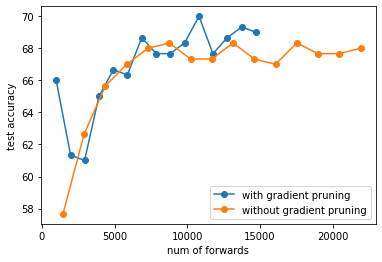

In [ ]:
import matplotlib.pyplot as plt

plt.plot(num_forward1, accu1, marker='o', label="with gradient pruning")
plt.plot(num_forward2, accu2, marker='o', label="without gradient pruning")
plt.ylabel("test accuracy")
plt.xlabel("num of forwards")
plt.legend()
plt.show()